In [9]:
import pandas as pd
import numpy as np

In [10]:
DAYS = 7
PERIOD = 24*DAYS
START = 0
CONVENTIONAL_DIR = 'default SAC 500 norm space results' + '/'
#ATLA_DIR = 'PPO agent 100 alts over 0+500 1-17-21 results' + '/'

In [11]:
df_actions = pd.read_csv(CONVENTIONAL_DIR+'baseline_obs-a.csv',
                                            header=0,
                                            usecols=['actions'],)

In [12]:
df_actions.columns = ['Clean']

In [19]:
df_actions['Untargeted_Binary_ACG_05'] = pd.read_csv(CONVENTIONAL_DIR+r'uACG_binary_SAC_05_eps adv a-obs.csv',
                                            header=0,
                                            usecols=['a'],)

In [14]:
df_actions['Untargeted_Binary_ACG_05_Clean'] = pd.read_csv(CONVENTIONAL_DIR+r'uACG_binary_SAC_05_eps a-obs.csv',
                                            header=0,
                                            usecols=['a'],)

In [20]:
df_actions['Untargeted_Binary_ACG_03'] = pd.read_csv(CONVENTIONAL_DIR+r'uACG_binary_SAC_03_eps adv a-obs.csv',
                                            header=0,
                                            usecols=['a'],)

In [21]:
df_actions['Untargeted_Binary_ACG_03_Clean'] = pd.read_csv(CONVENTIONAL_DIR+r'uACG_binary_SAC_03_eps a-obs.csv',
                                            header=0,
                                            usecols=['a'],)

In [15]:
df_actions['Clean'].describe()

count    8759.000000
mean        0.410987
std         0.189643
min         0.003066
25%         0.314610
50%         0.405802
75%         0.537769
max         0.989104
Name: Clean, dtype: float64

<Axes: title={'center': 'Clean and Untargeted ACG Actions over One Week'}, xlabel='Time (hours)', ylabel='Action (proportion to (dis)charge)'>

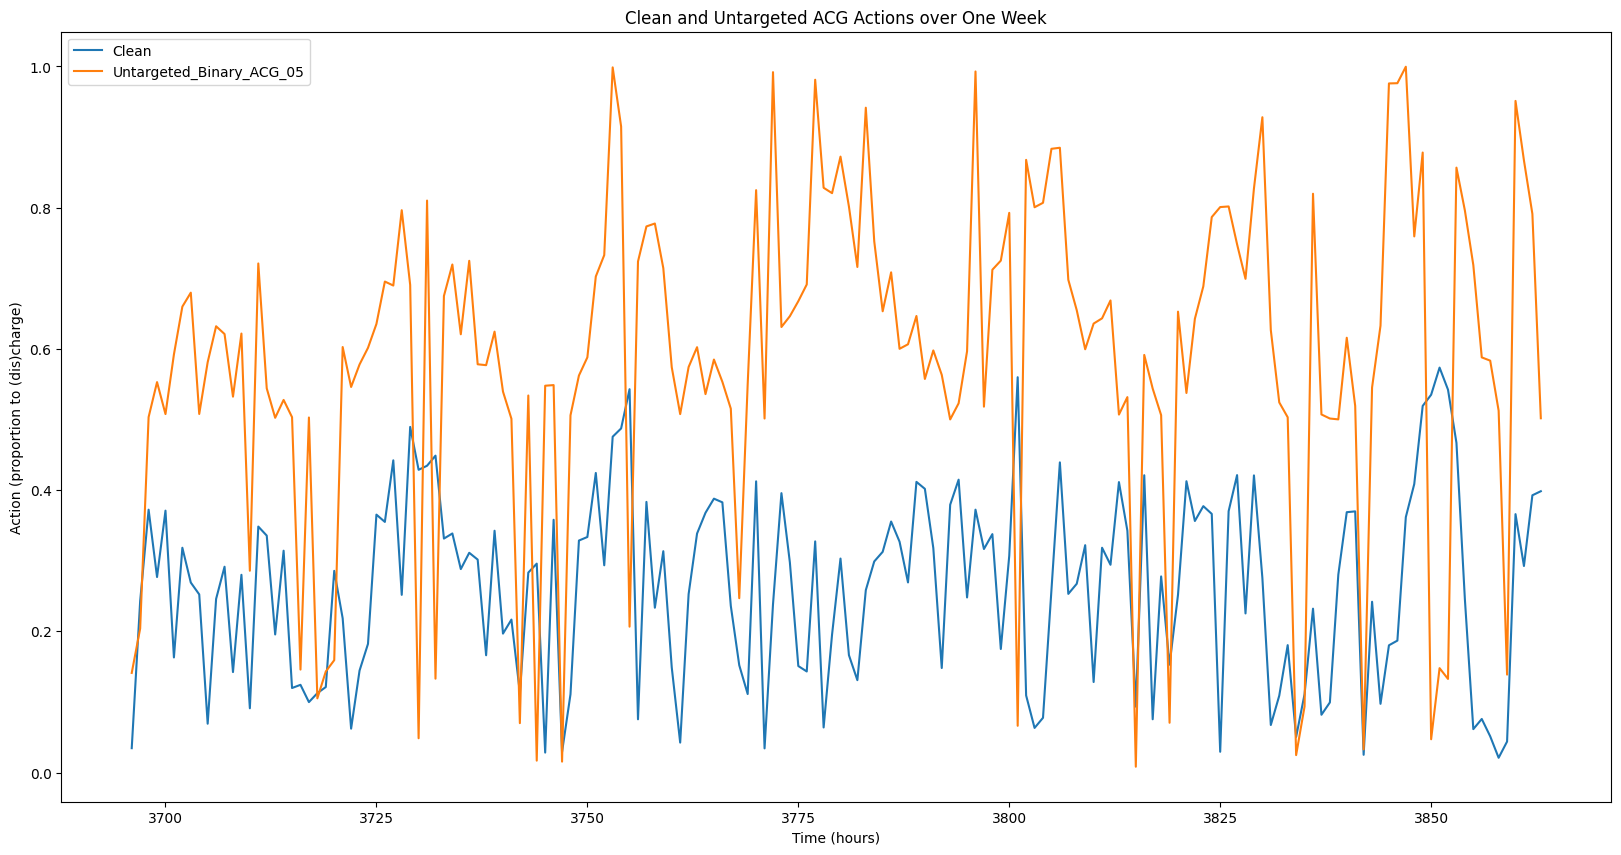

In [23]:
offest = 22*PERIOD
df_actions.iloc[START+offest:offest+START+PERIOD][['Clean','Untargeted_Binary_ACG_05']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    #yticks=actions_to_SoC,
    title='Clean and Untargeted ACG Actions over One Week',
    xlabel='Time (hours)'
)#.set_xticks(ticks=range(0,PERIOD,24),
#             labels=['Day ' + str(i+1) for i in range(DAYS)])

<Axes: title={'center': 'Clean and Untargeted ACG Actions over One Week'}, xlabel='Time (hours)', ylabel='Action (proportion to (dis)charge)'>

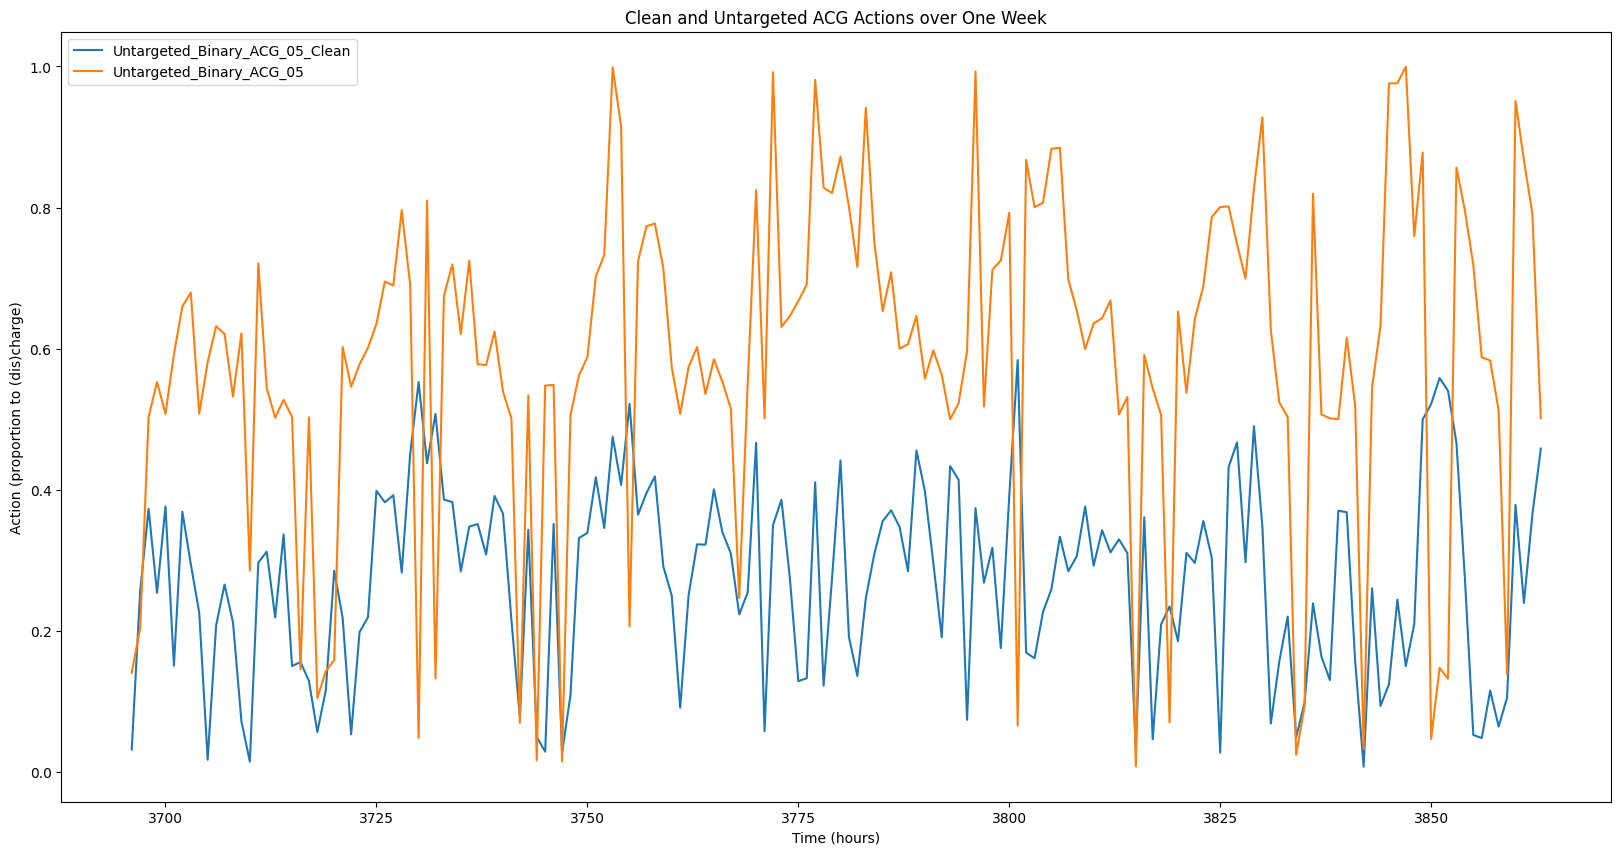

In [24]:
offest = 22*PERIOD
df_actions.iloc[START+offest:offest+START+PERIOD][['Untargeted_Binary_ACG_05_Clean','Untargeted_Binary_ACG_05']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    #yticks=actions_to_SoC,
    title='Clean and Untargeted ACG Actions over One Week',
    xlabel='Time (hours)'
)#.set_xticks(ticks=range(0,PERIOD,24),
#             labels=['Day ' + str(i+1) for i in range(DAYS)])

The RegressorWrapper assumed an action space of [-1,1], however it's [0,1]. THe current loss function always bakes the agent discharge (clipped to action 0). We need a wrapper where one logit is maxed for 0 and the other for 1. Some function of -x^2 ?

<Axes: title={'center': 'Clean and Untargeted ACG Actions over One Week'}, xlabel='Time (hours)', ylabel='Action (proportion to (dis)charge)'>

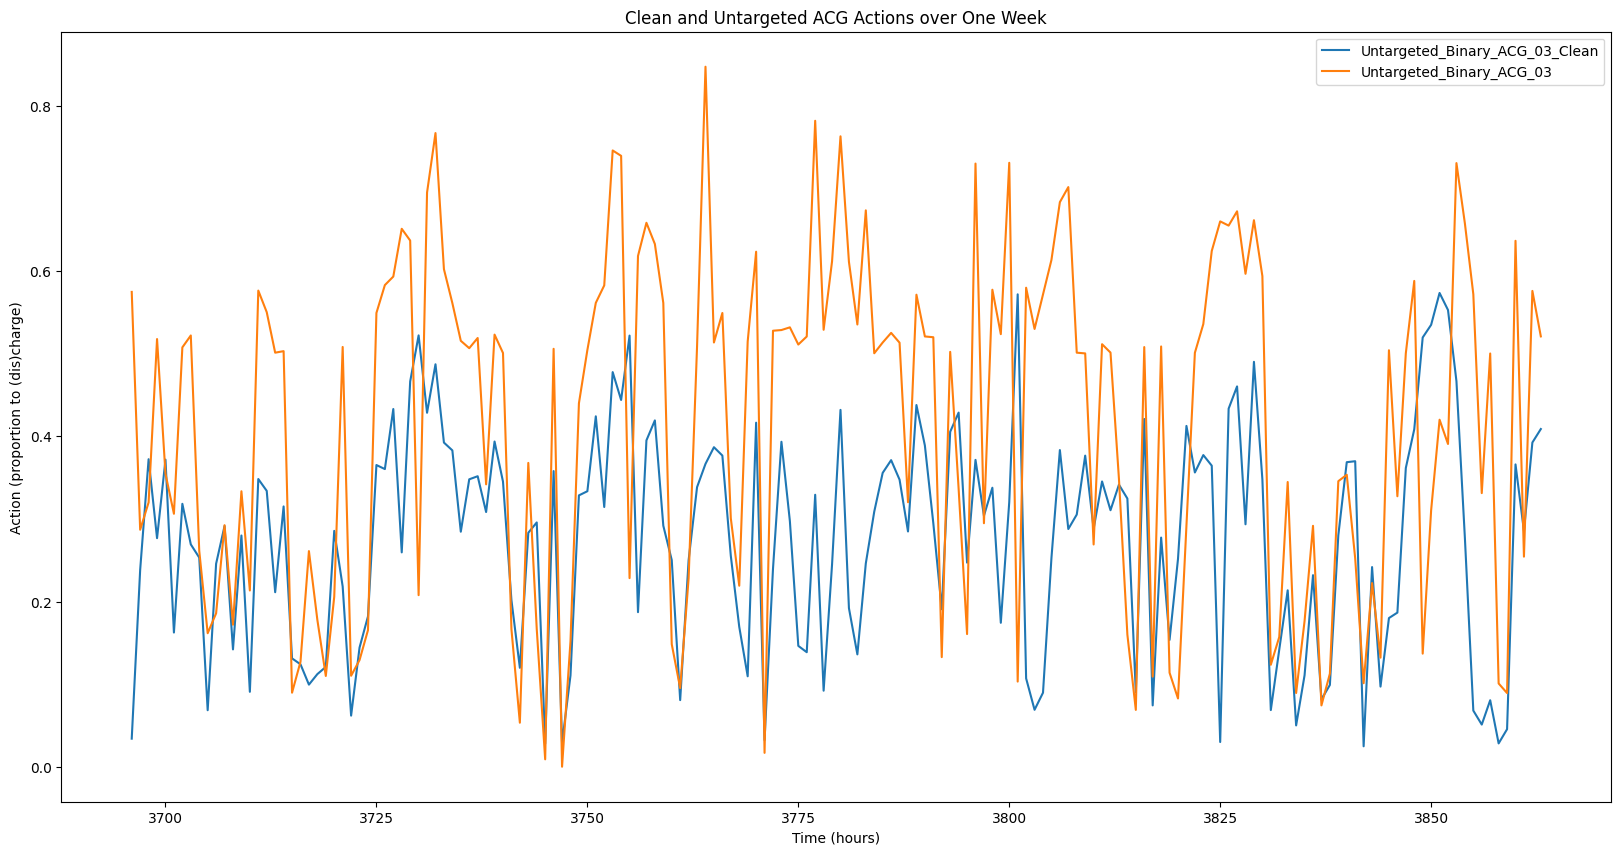

In [25]:
offest = 22*PERIOD
df_actions.iloc[START+offest:offest+START+PERIOD][['Untargeted_Binary_ACG_03_Clean','Untargeted_Binary_ACG_03']].plot.line(
    figsize=(20,10),
    ylabel='Action (proportion to (dis)charge)',
    #yticks=actions_to_SoC,
    title='Clean and Untargeted ACG Actions over One Week',
    xlabel='Time (hours)'
)#.set_xticks(ticks=range(0,PERIOD,24),
#             labels=['Day ' + str(i+1) for i in range(DAYS)])

Compared to ACG 0.05, 0.03 shows more ts with smaller differences between the clean and adversarial actions, even though there is a difference. These are technically successful adv samples, but their impact is small